Exercise folder that contains carprices.csv. This file has car sell prices for 3 different models. First plot data points on a scatter plot chart to see if linear regression model can be applied. If yes, then build a model that can answer following questions,

1) Predict price of a mercedez benz that is 4 yr old with mileage 45000

2) Predict price of a BMW X5 that is 7 yr old with mileage 86000

3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model

In [3]:
df = pd.read_csv('https://github.com/codebasics/py/raw/master/ML/5_one_hot_encoding/Exercise/carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [23]:
df.rename(columns={'Sell Price($)':'price',
                  'Age(yrs)':'age'},inplace=True)
df

,Car Model,Mileage,price,age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


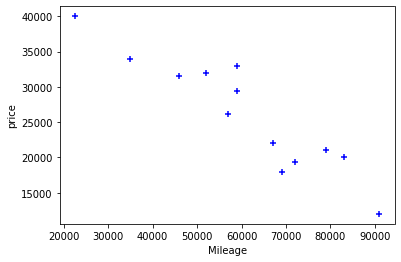

In [19]:
plt.xlabel('Mileage')
plt.ylabel('price')
plt.scatter(df.Mileage,df.price,color='blue',marker='+')

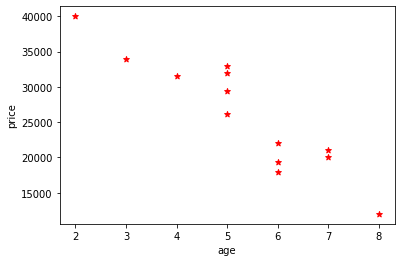

In [24]:
plt.xlabel('age')
plt.ylabel('price')
plt.scatter(df.age,df.price,color='red',marker='*')

In [32]:
#There is linear relation of age and mileage of car with the price. So we will apply multivariable linear regression
dummies = pd.get_dummies(df['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [34]:
merge = pd.concat([df,dummies],axis='columns')
merge

,Car Model,Mileage,price,age,Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [36]:
final=merge.drop(['Car Model','Mercedez Benz C class'],axis='columns')
final

,Mileage,price,age,Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [37]:
x=final.drop('price',axis='columns')
x

,Mileage,age,Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [38]:
y=final.price
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: price, dtype: int64

In [39]:
model= linear_model.LinearRegression()

In [40]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
model.score(x,y)

0.9417050937281083

In [43]:
#Price of mercedez benz that is 4 yr old with mileage 45000
model.predict([[45000,4,0,0]])

array([36991.31721061])

In [44]:
#Price of BMW X5 that is 7 yr old with mileage 86000
model.predict([[86000,7,0,1]])

array([11080.74313219])